In [153]:
import numpy as np
from scipy import linalg
from PIL import Image
import matplotlib.pyplot as plt

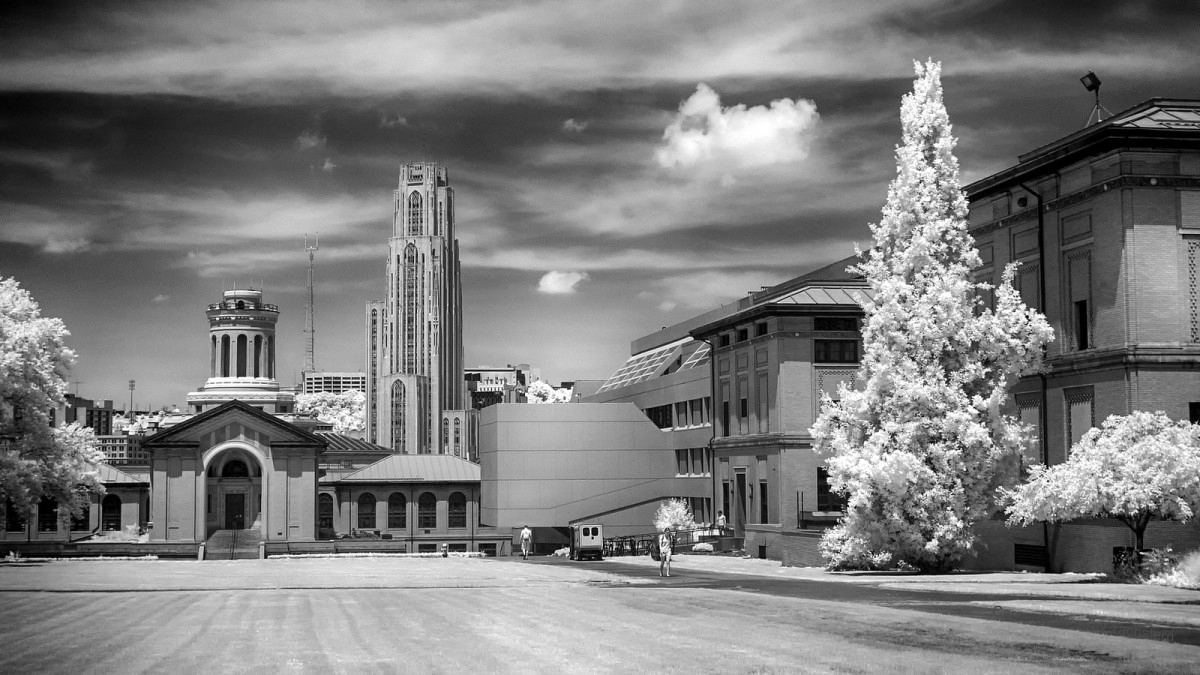

In [154]:
image = Image.open('CMU_Grayscale.png')
image

In [155]:
def svd_compress_image(compression_ratio):
    """
    Given a greyscale image of size m*n, this returns the compressed SVD matrices Uc, sc, Vhc made from U,s,Vh such that:
    * U@S@Vh = image
    * Uc@Sc@Vhc approximately equals image
    * The total number of numbers in Uc, sc, and Vhc is as close to compression_ratio*m*n as possible without exceeding it

    Inputs:
    ----
    * compression_ratio: a number in (0,1.0] indicating the size fraction of the original image that compressed image data should be

    Returns:
    ----
    * Uc,sc,Vhc: as described above (note: sc is an array of singular values, not the zero-filled matrix Sc)
    * compressed_size: the total number of numbers stored in the Uc, sc, and Vhc
    * actual_compression: actual compression ratio achieved, should be <= compression_ratio
    * compressed_image: the reconstructed post-compression image. Note: since this will have the same dimensions as the given image, it will not be reduced in size. That's the job of Uc, sc, and Vhc.

    Compression Theory:
    ----
    If, for an m*n image, we choose to keep ns singular value modes, we'll need to keep track of:
    m*ns numbers in the first ns columns of U, 
    ns singular values
    and n*ns numbers in the first ns rows of Vh.
    Thus, for a compression ratio of R, we want to store only only R*m*n numbers, 
    so we need to solve for the number of singular value modes to keep in the following:
    R*m*n = m*ns + ns + n*ns = (m+1+n)*ns -> ns = floor(R*m*n/(m+n+1)).
    """
    assert compression_ratio > 0.0 and compression_ratio <= 1.0, 'Invalid compression ratio.'
    mat = np.asarray(image) # convert to array
    (m,n) = mat.shape
    original_size = m*n # original number of numbers being tracked

    U,s,Vh = linalg.svd(mat) # perform svd
    ns = int(compression_ratio*m*n/(m+n+1)) # determine number of modes to keep and ensure we come in slightly under target size rather than slightly over
    ns = ns if ns > 0 else 1
    # Keep only ns most important modes:
    Uc = U[:,0:ns]
    sc = s[0:ns]
    Vhc = Vh[0:ns,:]

    # Reconstruct compressed image:
    Sc = np.zeros((ns,ns))
    for i in range(ns):
        Sc[i, i] = sc[i]
    compressed_image = Image.fromarray(np.array(Uc@Sc@Vhc, dtype=np.uint8))

    compressed_size = Uc.size + sc.size + Vhc.size
    actual_compression = compressed_size/m/n
    assert actual_compression <= compression_ratio, 'Compression failed.'


    return Uc,sc,Vhc, compressed_size, actual_compression, compressed_image

In [167]:
def perform_compression_trial(compression_ratio):
    """Performs SVD image compression for the target compression ratio and returns and displays results."""
    Uc,sc,Vhc, compressed_size, actual_compression, compressed_image = svd_compress_image(compression_ratio)
    print("\n####\nAttempted to compress image of size {:0.0f} down to {:0.1f}%. Achieved final image size of {:0.0f} with compression to {:0.1f}% shown below.\n".format(compressed_size/actual_compression, 100*compression_ratio, compressed_size, 100*actual_compression))
    %matplotlib inline
    plt.figure(figsize = (15,15))
    plt.imshow(np.asarray(compressed_image), cmap='gray')
    plt.imsave("24677_ps3_q5_compressed_to_{:3d}.jpg".format(int(100*compression_ratio)),compressed_image, cmap='gray')


####
Attempted to compress image of size 810000 down to 50.0%. Achieved final image size of 403340 with compression to 49.8% shown below.



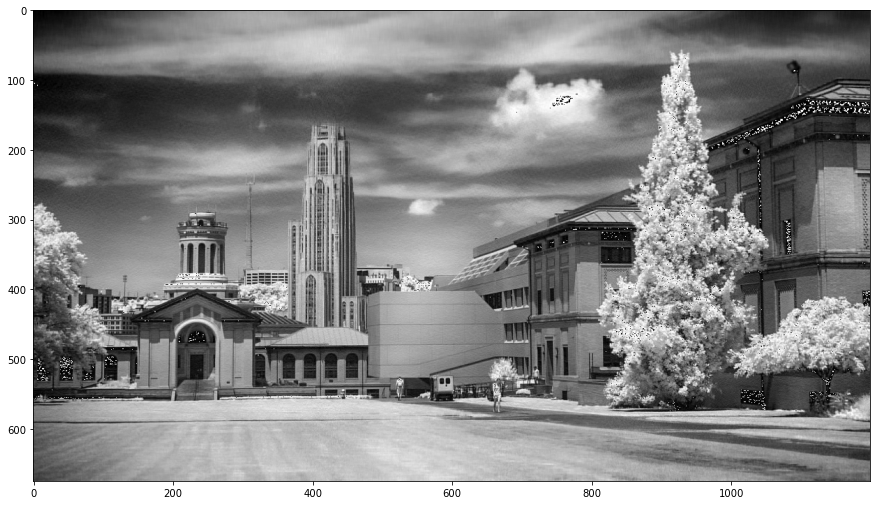

In [173]:
perform_compression_trial(0.5)


####
Attempted to compress image of size 810000 down to 10.0%. Achieved final image size of 80668 with compression to 10.0% shown below.



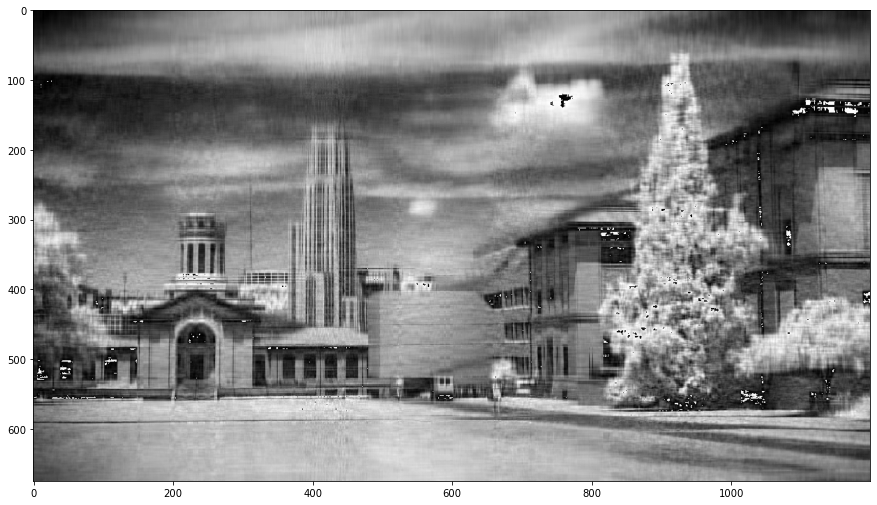

In [172]:
perform_compression_trial(0.1)


####
Attempted to compress image of size 810000 down to 5.0%. Achieved final image size of 39396 with compression to 4.9% shown below.



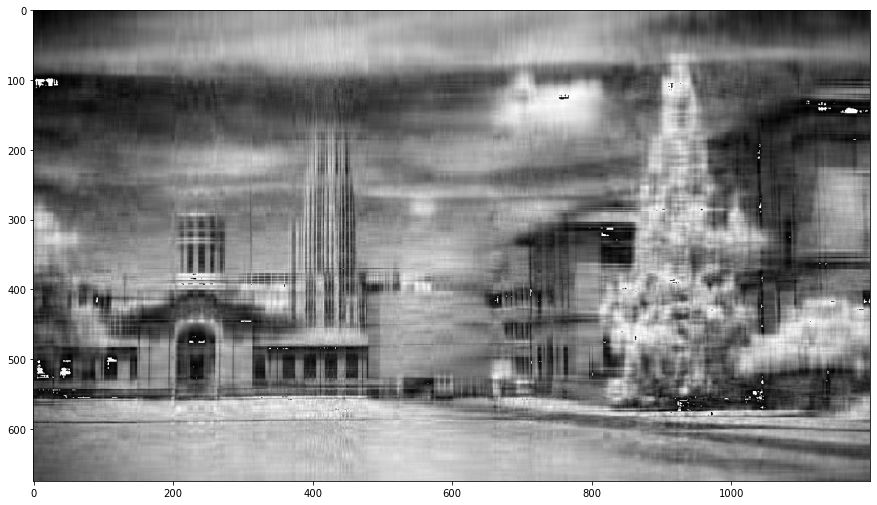

In [171]:
perform_compression_trial(0.05)